In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import fits
from os import listdir as ls
from scipy.stats import mode

sns.set_context('talk')
sns.set_style('darkgrid')

In [2]:
# Return list of filenames
# associated with a given string
def read_filetype(file_str):
    return [fname for fname in ls('.')
            if (('fixed_header.fits' in fname)
                & (file_str in fname))]

# Creates list of filenames for
# each image type
bias_fnames = read_filetype('BIAS')
dark_fnames = read_filetype('DARK')
flat_fnames = read_filetype('FLAT')
image_fnames = read_filetype('7')

# Given a single fits filename
# returns data of the fits file
def read_fits(fits_fname):
    return fits.open(fits_fname, uint=False)[0].data

# Given a list of N fits filenames
# with identical dimensions X, Y
# returns a numpy array with shape
# (N, X, Y) containing the data
# of the fits files
def make_fits_list_array(fits_list):
    test_data = read_fits(fits_list[0])
    (x_dim, y_dim) = np.shape(test_data)
    n_files = len(fits_list)
    all_array = np.empty((n_files, x_dim, y_dim))
    for i in range(0, n_files):
        all_array[i, :, :] = read_fits(fits_list[i])
    return all_array


# Creates arrays for each image type
bias_all = make_fits_list_array(bias_fnames)
dark_all = make_fits_list_array(dark_fnames)
flat_all = make_fits_list_array(flat_fnames)
image_all = make_fits_list_array(image_fnames)

In [3]:
# Create median dark+bias
dark_median = np.median(dark_all, axis=0)
bias_median = np.median(bias_all, axis=0)

# Create median flat
temp_flat = flat_all - bias_median
flat_median = np.empty_like(temp_flat)
for i in range(0, len(flat_fnames)):
    flat_median[i, :, :] = temp_flat[i]/mode(temp_flat[i],
                                             axis=None)[0][0]
flat_median = np.median(flat_median, axis=0)

# Create reduced science image
image_temp = (image_all - dark_median)/flat_median
image_median = np.median(image_temp, axis=0)


In [37]:
image_temp[np.where(image_temp <= 0.0)] = 0.0
from matplotlib.colors import LogNorm, PowerNorm

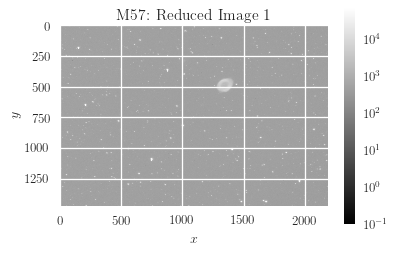

In [47]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
ax = plt.imshow(image_temp[0],
                norm=LogNorm(),
               cmap='gray')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('M57: Reduced Image 1')
plt.show()

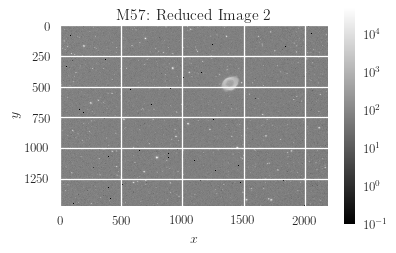

In [46]:
ax = plt.imshow(image_temp[1],
                norm=LogNorm(),
               cmap='gray')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('M57: Reduced Image 2')
plt.show()

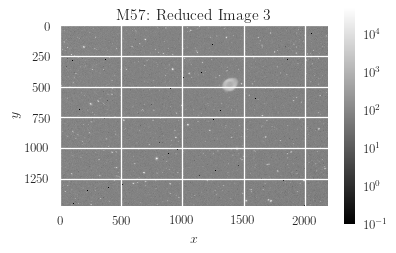

In [33]:
ax = plt.imshow(image_temp[2],
                norm=LogNorm(),
               cmap='gray')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('M57: Reduced Image 3')
plt.show()